In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split # simple TT split cv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kellerdevin/Regression-Neural-Network/main/song_data.csv")

In [ ]:
df = df.head(500)

In [ ]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [ ]:
df.drop('song_name', axis=1, inplace=True)

In [ ]:
df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,67,195306,0.319000,0.623,0.910,0.000448,9,0.0810,-8.448,1,0.0384,145.624,4,0.745
496,64,467640,0.009750,0.436,0.657,0.007480,5,0.0931,-8.868,1,0.0541,118.693,4,0.210
497,59,365000,0.160000,0.287,0.562,0.000000,0,0.1030,-7.549,1,0.0304,147.622,4,0.126
498,72,248173,0.069400,0.531,0.818,0.009600,2,0.2630,-5.358,1,0.0452,90.767,4,0.471


In [ ]:
features = ["song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness","tempo", "time_signature", "audio_valence"]
target = "song_popularity"

In [ ]:
X = df[features]
y = df[target]
y

0      73
1      66
2      76
3      74
4      56
       ..
495    67
496    64
497    59
498    72
499    64
Name: song_popularity, Length: 500, dtype: int64

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.1, random_state=42)


In [ ]:
test_targets

361    0.868
73     0.158
374    0.931
155    0.225
104    0.621
394    0.520
377    0.491
124    0.583
68     0.854
450    0.425
9      0.374
194    0.549
406    0.311
84     0.777
371    0.410
388    0.373
495    0.745
30     0.674
316    0.654
408    0.388
490    0.632
491    0.264
280    0.937
356    0.387
76     0.777
461    0.498
497    0.126
211    0.813
101    0.794
334    0.574
475    0.778
336    0.435
440    0.777
173    0.374
2      0.324
333    0.503
409    0.750
70     0.367
209    0.905
63     0.303
384    0.784
93     0.952
485    0.677
185    0.166
33     0.453
77     0.620
0      0.474
11     0.243
415    0.776
22     0.687
Name: audio_valence, dtype: float64

Normalizing the data

In [ ]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Model Definition

In [ ]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

K-fold validation

In [ ]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[0.16177470982074738,
 0.19229240715503693,
 0.17716529965400696,
 0.19057908654212952]

In [ ]:
np.mean(all_scores)

0.1804528757929802

Off by 18% on average

In [ ]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

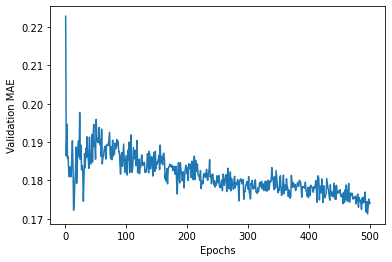

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

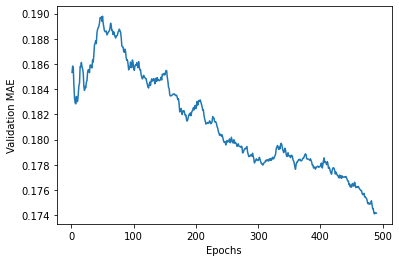

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
  epochs=500, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 15ms/step - loss: 0.0491 - mae: 0.1670


In [ ]:
test_mae_score

0.16699858009815216

17%